## Question 3

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
D = np.array([1.0, 1.3, 2.2, 2.6, 2.8, 5.0, 7.3, 7.4, 7.5, 7.7])

#number of Clusters
k = 2                                   
nd = len(D)

#Intial mean, variances and prior probabilities
mean = np.array([6.63,7.57])            
var = np.array([1,1])                   
prior_prob = np.array([0.5,0.5])         

### 3.1 Log-likelihood

In [3]:
likelihood = 0                               
log_likelihood = 0

for d in range(nd):                       
    for i in range(k):
         likelihood += ((1/(np.sqrt(2*np.pi*var[i]))) * np.exp(-0.5*(((D[d]-mean[i])**2)/var[i])))*prior_prob[i]
    log_likelihood += np.log(likelihood)
    
print(f"Log-likelihood value: {log_likelihood}") 

Log-likelihood value: -66.08363702694996


### 3.2 E-step

In [5]:
w =np.zeros((nd,k))
for i in range(k):
    w[:,i] = prior_prob[i] * (1/(np.sqrt(2*np.pi*var[i])) * np.exp(-0.5*((((D-mean[i])**2)/var[i]))))
    
#Creating data frame for w_1 and w_2 values.
data_frame = pd.DataFrame(data=w, columns=[f'w_{i + 1}' for i in range(k)])

#Computing the denominator value from formula
data_frame['w_denom']= np.sum(data_frame, axis = 1)                              
data_frame['w_1_parameter'] = data_frame['w_1']/data_frame['w_denom']
data_frame['w_2_parameter'] = data_frame['w_2']/data_frame['w_denom']
data_frame['Data Point'] = D

#Dropping Numerator and denominator values
df = data_frame.drop(['w_1', 'w_2', 'w_denom'], axis=1)                
df.set_index('Data Point', inplace=True)

print('Posterior Probability is given below for each data point:')
df

Posterior Probability is given below for each data point:


,w_1_parameter,w_2_parameter
Data Point,,
1.0,0.996776,0.003224
1.3,0.995731,0.004269
2.2,0.990107,0.009893
2.6,0.985656,0.014344
2.8,0.982741,0.017259
5.0,0.878040,0.121960
7.3,0.453138,0.546862
7.4,0.429964,0.570036
7.5,0.407092,0.592908


### M-Step

In [7]:
#converting the dataframe into a matrix

mat = df.values                              
mean = np.zeros(2)
var = np.zeros(2)
prior_prob = np.zeros(2)

for i in range(k):                            
    mean[i] = np.dot(mat[:,i],D)/np.sum(mat[:,i])
    var[i] = np.dot(mat[:,i],((D-mean[i])**2))/np.sum(mat[:,i])
    prior_prob[i] = np.sum(mat[:,i])/nd
        
print(f'The means values are: {mean}')            
print(f'The variance values are: {var}')
print(f'The prior probability values are: {prior_prob}')

The means values are: [3.54310792 7.2636904 ]
The variance values are: [5.60786076 0.78572332]
The prior probability values are: [0.74818672 0.25181328]


## Question 4 

In [9]:
iris = datasets.load_iris()

#Creating a data frame with Iris dataset
Iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
Iris_df['species'] = iris.target
Iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
Iris_df = Iris_df[["sepal length (cm)", "sepal width (cm)", "species"]]
Iris_df

,sepal length (cm),sepal width (cm),species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


### 4.1 Plot 

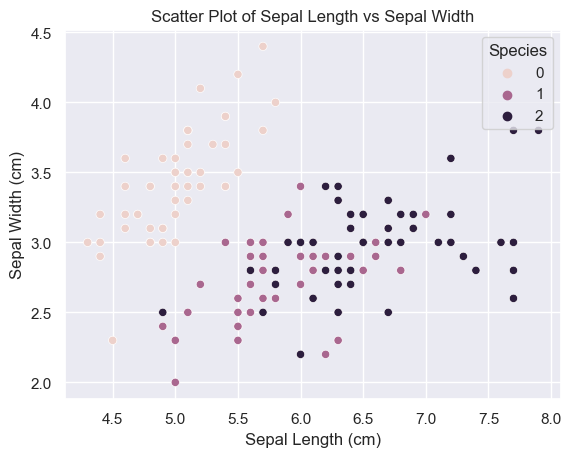

In [11]:
#plotting the two features with associated class labels

sns.set(style="darkgrid")
sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)", hue="species", data=Iris_df)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Scatter Plot of Sepal Length vs Sepal Width")
plt.legend(title="Species")
plt.show()


### 4.2 

In [12]:
from sklearn.cluster import KMeans
X = Iris_df[['sepal length (cm)', 'sepal width (cm)']]

# Creating a kmeans model with 3 clusters 
kmeans = KMeans(n_clusters=3, random_state=0)  

# Getting the Cluster labels
cluster_lb = kmeans.fit_predict(X) 

#Adding the cluster labels to data frame
Iris_df['cluster'] = cluster_lb

Iris_df

,sepal length (cm),sepal width (cm),species,cluster
0,5.1,3.5,0,2
1,4.9,3.0,0,2
2,4.7,3.2,0,2
3,4.6,3.1,0,2
4,5.0,3.6,0,2
...,...,...,...,...
145,6.7,3.0,2,1
146,6.3,2.5,2,0
147,6.5,3.0,2,1
148,6.2,3.4,2,1


### 4.2 (a)

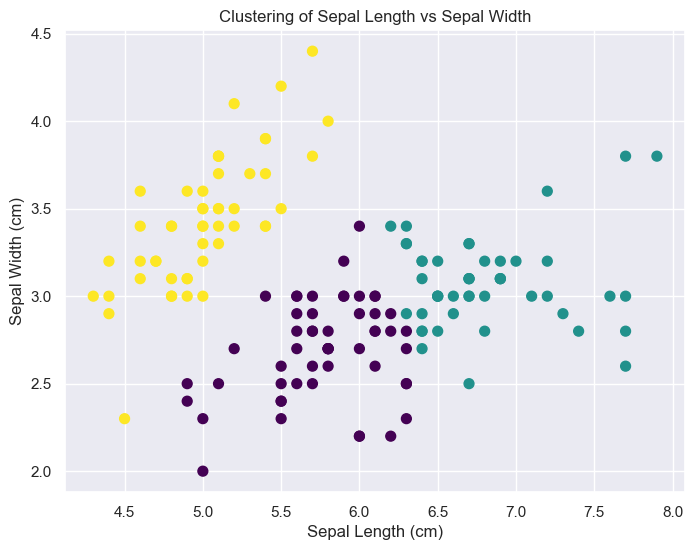

In [13]:
# Plotting the two features with associated cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(Iris_df['sepal length (cm)'], Iris_df['sepal width (cm)'], c=Iris_df['cluster'], cmap='viridis', s=50)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Clustering of Sepal Length vs Sepal Width")
plt.show()

### 4.2 (b)

In [14]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, cluster_lb) 
print(f"Silhouette Index: {silhouette_avg}")

Silhouette Index: 0.44505256920836367


### 4.2 (c)

If the Silhouette index is high(more closer to 1) for a particular clustering, it suggests that the clusters formed by the algorithm are distinct and well-separated based on the chosen features. In this case, the clustering assignment provides valuable insights as the k-Means produced clusters (not fully)partially align with the class labels.

Partial Alignment: The k-Means produces clusters that partially align with the class labels. Which means it may group some species correctly but not others. In this scenario, k-Means captures some of the underlying patterns in the class labels data but not all.

### 4.3

In [12]:
X = Iris_df[["sepal length (cm)", "sepal width (cm)"]]

k_values = range(2, 51)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

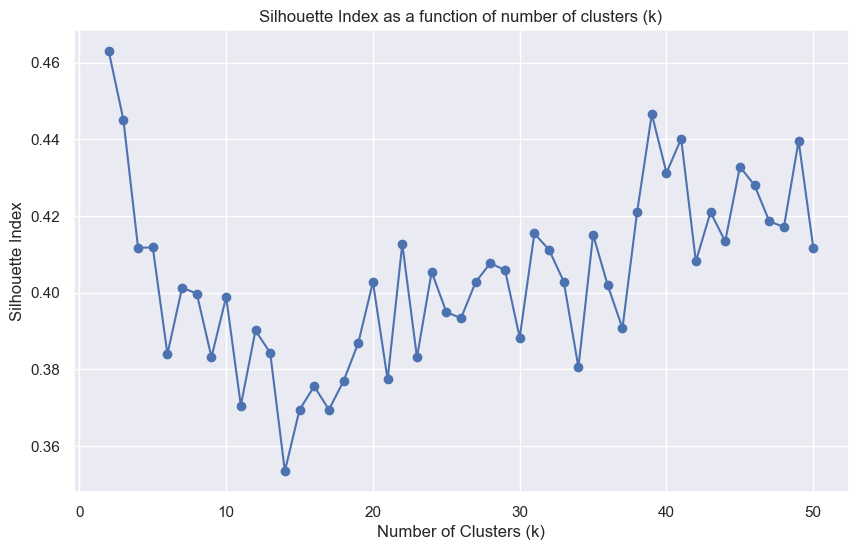

In [13]:
#  Plotting Silhouette Index as a function of k

plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Index as a function of number of clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Index')
plt.grid(True)
plt.show()

Yes. k=2 and 39 have silhouette index values greater than k=3, but k=2 has the highest value.

Silhouette index is a measure that helps assess the quality of clusters produced by a clustering algorithm. It quantifies how similar each data point is to its own cluster compared to other clusters. 
A high Silhouette score indicates that the clusters are well-separated and data points are tightly grouped within their respective clusters. 

Hence, the one with the higher average Silhouette score is considered to perform better in terms of cluster quality.

### 4.4

In [14]:
# K-medoids

from sklearn_extra.cluster import KMedoids

X = Iris_df[["sepal length (cm)", "sepal width (cm)"]]

# creating the K-medoids model with 3 clusters
kmedoids = KMedoids(n_clusters=3, random_state=0)     
kmedoids.fit(X)

# Getting the Cluster labels
cluster_labels = kmedoids.labels_                    

# Adding the cluster labels to the data frame
Iris_df['cluster'] = cluster_labels                  

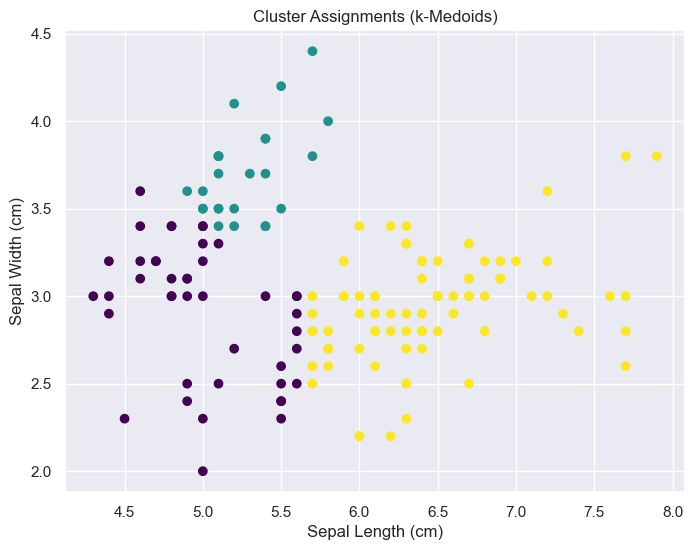

In [15]:
# Plotting the two features with associated cluster labels

plt.figure(figsize=(8, 6))
plt.scatter(Iris_df['sepal length (cm)'], Iris_df['sepal width (cm)'], c=Iris_df['cluster'], cmap='viridis')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Cluster Assignments (k-Medoids)")
plt.show()

In [16]:
#Comparing with Kmeans

X = Iris_df[['sepal length (cm)', 'sepal width (cm)']]

# Creating the kmeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)    

#Obtaining Cluster labels and adding the cluster labels to the data frame
cluster_lb = kmeans.fit_predict(X)            
Iris_df['cluster'] = cluster_lb               

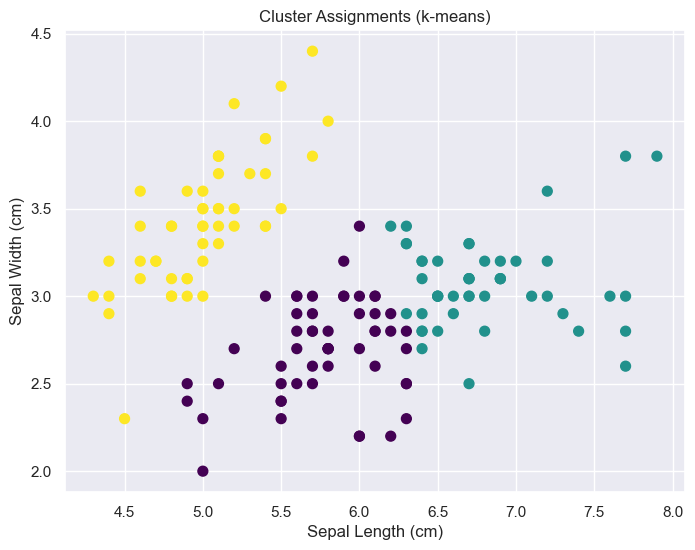

In [17]:
# Plot the two features with associated cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(Iris_df['sepal length (cm)'], Iris_df['sepal width (cm)'], c=Iris_df['cluster'], cmap='viridis', s=50)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Cluster Assignments (k-means)")
plt.show()

The cluster assignment for both K-mediods and k-means are almost the same except very few datapoints. The cluster assignments here for Iris dataset has some outliers and clusters with non-spherical shapes. So K-mediods might be a better choice as compared to k means because it is more robust to outliers and can handle clusters of different shapes.